## Importing Libraries

In [17]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

### Loading Model

In [2]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

In [3]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

### Visualising and Performing Prediction on Single image

In [11]:
!pip install opencv-python

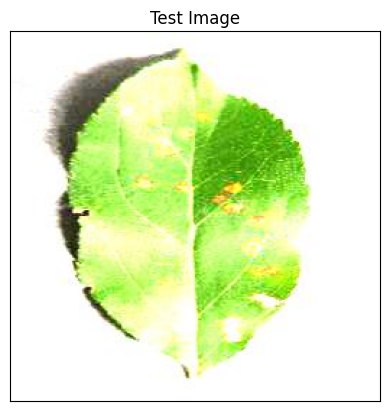

In [48]:
import cv2
image_path = "test/AppleCedarRust1.JPG" 
# Reading an image in default mode

img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [ ]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
print(input_arr.shape)



(1, 128, 128, 3)


In [52]:
predictions = cnn.predict(input_arr)
predictions,predictions.shape

1/1 [==============================] - 0s 36ms/step


(array([[0.03043557, 0.02927477, 0.02536491, 0.02723111, 0.02550827,
         0.02343865, 0.02390872, 0.02203019, 0.02734634, 0.02612271,
         0.02353009, 0.0256147 , 0.02562605, 0.02500851, 0.02626859,
         0.03256124, 0.02374746, 0.02221615, 0.02903262, 0.02872181,
         0.03015262, 0.02763571, 0.02845616, 0.02173623, 0.02501944,
         0.02645772, 0.02624275, 0.02771146, 0.02469535, 0.02571193,
         0.02446589, 0.03169478, 0.02633458, 0.02511546, 0.02776213,
         0.02686609, 0.02232805, 0.02862522]], dtype=float32),
 (1, 38))

In [53]:

result_index = np.argmax(predictions) #Return index of max element
print(result_index)


15


In [54]:
class_name = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

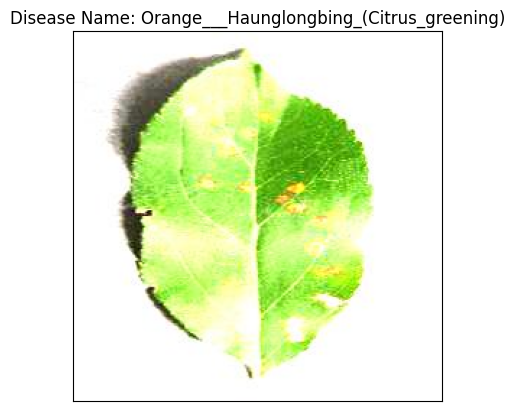

In [55]:

# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()


In [56]:
model_prediction

'Orange___Haunglongbing_(Citrus_greening)'